In [12]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def de_sigmoid(z):
    return z * (1 - z)


def ZCAwhiten(x):
    m, n = x.shape
    x_mean = np.mean(x, 0)
    x = x - x_mean
    cov = x.T @ x / m 
    w, v = np.linalg.eig(cov)
    x_whiten = x @ v / w @ v.T
    return x_whiten


def linearDe(x, n_iter=400, layer_size=400, p=0.035, alpha=0.001, beta=1):
    m, n = x.shape
    x_ = np.hstack((np.ones((m, 1)), x))
    np.random.seed(5)
    low = np.sqrt(6 / (n + layer_size))
    w1 = np.random.uniform(-low, low, (n + 1, layer_size))
    w2 = np.random.uniform(-low, low, (layer_size + 1, n))

    for i in range(n_iter):
        # 前向传播
        h = sigmoid(x_ @ w1)
        h_ = np.hstack((np.ones((h.shape[0], 1)), h))
        x_hat = h_ @ w2

        # 计算损失
        p_hat = np.mean(h, 1)
        kl = -np.sum(p * np.log(p_hat) + (1-p) * np.log(1-p_hat))
        err = x_hat - x
        cost = (np.sum(err.T @ err) / 2 + beta * kl) / m
        if i % 1 == 0:
            print(i, ' : ', cost)

        # 反向传播
        delta2 = err
        grad2 = alpha * h_.T @ delta2 / m

        delta1 = delta2 @ w2[1:].T + beta * (-p/p_hat + (1-p)/(1-p_hat)).reshape(-1, 1) * de_sigmoid(h)

        grad1 = alpha * x_.T @ delta1 / m

        w2 -= grad2
        w1 -= grad1

    return w1, h, x_hat


def visualizeW1(opt_W1, vis_patch_side, hid_patch_side):
    """ Add the weights as a matrix of images """

    figure, axes = plt.subplots(nrows=hid_patch_side,
                                              ncols=hid_patch_side)
    index = 0

    for axis in axes.flat:
        """ Add row of weights as an image to the plot """

        image = axis.imshow(opt_W1[index].reshape(3, vis_patch_side, vis_patch_side).T,
                             interpolation='nearest')
        axis.set_frame_on(False)
        axis.set_axis_off()
        index += 1

    """ Show the obtained plot """

    plt.show()


In [2]:
path = 'F:/UFLDL/stlSampledPatches.mat'
data = scio.loadmat(path)

x = data['patches'].T
x = ZCAwhiten(x)
print(x.shape)

(100000, 192)


In [14]:
layer_size = 5
w, h, x_hat = linearDe(x, n_iter=50, layer_size=layer_size*layer_size, 
                       p=0.01, alpha=0.001, beta=1)

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


0  :  43.7015169456


1  :  39.4913058011


2  :  34.9390874435


3  :  32.4466809913


4  :  30.7967315586


5  :  29.7539964798


6  :  29.0838033374


7  :  28.6326220736


8  :  28.3054440217


9  :  28.0437762909


10  :  27.8506702037


11  :  27.6850791968


12  :  27.5610981074


13  :  27.4508079762


14  :  27.3436039483


15  :  27.2716645728


16  :  27.1764598637


17  :  27.1133112214


18  :  27.0357543457


19  :  26.9757791056


20  :  26.9482820118


21  :  26.9290435815


22  :  26.8873585867


23  :  26.8297248207


24  :  26.8082660827


25  :  26.7711912913


26  :  26.722511661


27  :  26.6894801435


28  :  26.6396892767


29  :  26.5995470567


30  :  26.5882584847


31  :  26.5483695505


32  :  26.5158235355


33  :  26.4919934314


34  :  26.4636589493


35  :  26.4424456613


36  :  26.4290436805


37  :  26.4063465137


38  :  26.3791606086


39  :  26.3656848169


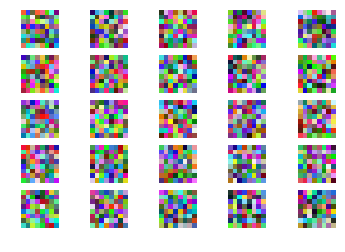

In [15]:
visualizeW1(w[1:].T, 8, layer_size)
# np.save('w_linearDecode.npy', arr=w)

(300, 2)


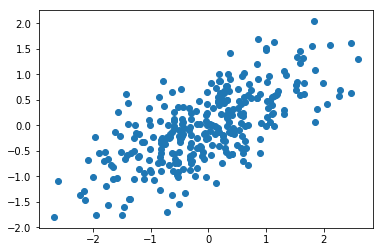

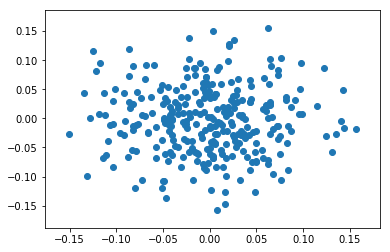

[ 1.  1.]


In [39]:
# a = np.arange(20).reshape(5, 4)
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 0.5]])
a = np.random.multivariate_normal(mean, cov, 300)
print(a.shape)
plt.figure()
plt.scatter(a[:, 0], a[:, 1])
plt.show()
w, v = np.linalg.eig(a.T @ a)
a_whiten = a @ v / np.sqrt(w) @ v.T
plt.figure()
plt.scatter(a_whiten[:, 0], a_whiten[:, 1])
plt.show()
w_, v_ =np.linalg.eig(a_whiten.T @ a_whiten)
print(w_)

In [16]:
a = np.arange(10).reshape(5, 2)
b = np.array([1, 2])
print(b.shape)
a / b

(2,)


array([[ 0. ,  0.5],
       [ 2. ,  1.5],
       [ 4. ,  2.5],
       [ 6. ,  3.5],
       [ 8. ,  4.5]])

In [11]:
a = np.arange(3*2*2).reshape(3, 2, 2)
print(a.T)

[[[ 0  4  8]
  [ 2  6 10]]

 [[ 1  5  9]
  [ 3  7 11]]]
